## Non Visualization

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def d_tanh(x):
    return 1 - np.tanh(x) ** 2


In [2]:
class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Initialize weights
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size)
        self.bf = np.zeros((hidden_size, 1))
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size)
        self.bi = np.zeros((hidden_size, 1))
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size)
        self.bo = np.zeros((hidden_size, 1))
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size)
        self.bc = np.zeros((hidden_size, 1))

    def forward(self, x_t, h_prev, c_prev):
        # Concatenate x_t and h_prev
        combined = np.vstack((x_t, h_prev))

        # Forget gate
        f_t = sigmoid(np.dot(self.Wf, combined) + self.bf)
        
        # Input gate
        i_t = sigmoid(np.dot(self.Wi, combined) + self.bi)
        
        # Cell candidate
        c_hat_t = tanh(np.dot(self.Wc, combined) + self.bc)
        
        # New cell state
        c_next = f_t * c_prev + i_t * c_hat_t
        
        # Output gate
        o_t = sigmoid(np.dot(self.Wo, combined) + self.bo)
        
        # New hidden state
        h_next = o_t * tanh(c_next)
        
        return h_next, c_next


In [3]:
class BiLSTM:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.lstm_forward = LSTMCell(input_size, hidden_size)
        self.lstm_backward = LSTMCell(input_size, hidden_size)
        self.Wy = np.random.randn(output_size, 2 * hidden_size)
        self.by = np.zeros((output_size, 1))
    
    def forward(self, X):
        seq_len, input_size = X.shape
        h_f = np.zeros((self.hidden_size, 1))
        c_f = np.zeros((self.hidden_size, 1))
        h_b = np.zeros((self.hidden_size, 1))
        c_b = np.zeros((self.hidden_size, 1))
        
        h_forward_states = []
        h_backward_states = []
        
        # Forward pass
        for t in range(seq_len):
            x_t = X[t].reshape(-1, 1)
            h_f, c_f = self.lstm_forward.forward(x_t, h_f, c_f)
            h_forward_states.append(h_f)
        
        # Backward pass
        for t in reversed(range(seq_len)):
            x_t = X[t].reshape(-1, 1)
            h_b, c_b = self.lstm_backward.forward(x_t, h_b, c_b)
            h_backward_states.insert(0, h_b)
        
        h_forward_states = np.array(h_forward_states).reshape(seq_len, -1)
        h_backward_states = np.array(h_backward_states).reshape(seq_len, -1)
        
        h_combined = np.hstack((h_forward_states, h_backward_states))
        
        y_pred = np.dot(self.Wy, h_combined.T) + self.by
        
        return y_pred

# Example usage
seq_len = 5
input_size = 3
hidden_size = 3
output_size = 1

# Input data
X = np.random.rand(seq_len, input_size)

# Initialize Bi-LSTM
bi_lstm = BiLSTM(input_size, hidden_size, output_size)

# Forward pass
y_pred = bi_lstm.forward(X)
print("Output:\n", y_pred)


Output:
 [[0.94418351 1.41357593 1.01480923 0.9775839  0.68185676]]


## Visualized

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def plot_states(states, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    plt.plot(states, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend([f'State {i}' for i in range(states.shape[1])], loc='upper right')
    plt.grid(True)
    plt.show()


In [5]:
class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size)
        self.bf = np.zeros((hidden_size, 1))
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size)
        self.bi = np.zeros((hidden_size, 1))
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size)
        self.bo = np.zeros((hidden_size, 1))
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size)
        self.bc = np.zeros((hidden_size, 1))

    def forward(self, x_t, h_prev, c_prev):
        combined = np.vstack((x_t, h_prev))

        f_t = sigmoid(np.dot(self.Wf, combined) + self.bf)
        i_t = sigmoid(np.dot(self.Wi, combined) + self.bi)
        c_hat_t = tanh(np.dot(self.Wc, combined) + self.bc)
        c_next = f_t * c_prev + i_t * c_hat_t
        o_t = sigmoid(np.dot(self.Wo, combined) + self.bo)
        h_next = o_t * tanh(c_next)

        return h_next, c_next


In [6]:
class BiLSTM:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.lstm_forward = LSTMCell(input_size, hidden_size)
        self.lstm_backward = LSTMCell(input_size, hidden_size)
        self.Wy = np.random.randn(output_size, 2 * hidden_size)
        self.by = np.zeros((output_size, 1))
    
    def forward(self, X):
        seq_len, input_size = X.shape
        h_f = np.zeros((self.hidden_size, 1))
        c_f = np.zeros((self.hidden_size, 1))
        h_b = np.zeros((self.hidden_size, 1))
        c_b = np.zeros((self.hidden_size, 1))
        
        h_forward_states = []
        c_forward_states = []
        h_backward_states = []
        c_backward_states = []
        
        for t in range(seq_len):
            x_t = X[t].reshape(-1, 1)
            h_f, c_f = self.lstm_forward.forward(x_t, h_f, c_f)
            h_forward_states.append(h_f.flatten())
            c_forward_states.append(c_f.flatten())
        
        for t in reversed(range(seq_len)):
            x_t = X[t].reshape(-1, 1)
            h_b, c_b = self.lstm_backward.forward(x_t, h_b, c_b)
            h_backward_states.insert(0, h_b.flatten())
            c_backward_states.insert(0, c_b.flatten())
        
        h_forward_states = np.array(h_forward_states)
        c_forward_states = np.array(c_forward_states)
        h_backward_states = np.array(h_backward_states)
        c_backward_states = np.array(c_backward_states)
        
        h_combined = np.hstack((h_forward_states, h_backward_states))
        y_pred = np.dot(self.Wy, h_combined.T) + self.by

        return y_pred, h_forward_states, h_backward_states, c_forward_states, c_backward_states
    
    def plot_forward_states(self, h_forward_states, c_forward_states):
        plot_states(h_forward_states, 'Forward Hidden States', 'Time Step', 'Hidden State Value')
        plot_states(c_forward_states, 'Forward Cell States', 'Time Step', 'Cell State Value')
    
    def plot_backward_states(self, h_backward_states, c_backward_states):
        plot_states(h_backward_states, 'Backward Hidden States', 'Time Step', 'Hidden State Value')
        plot_states(c_backward_states, 'Backward Cell States', 'Time Step', 'Cell State Value')


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Example sentence sequence and corresponding classes
sentences = ["I love programming", "Python is great", "Machine learning is the future", "I enjoy learning new things", "AI is fascinating"]
labels = ["positive", "positive", "neutral", "positive", "positive"]

# Preprocessing: Convert sentences to word embeddings
# For simplicity, let's assume each word is represented by a 300-dimensional vector.
# In practice, you would use pre-trained embeddings.
# Here we simulate it with random vectors for illustration.

input_size = 300
max_seq_len = 5  # Max length of the sequences (pad shorter sentences)
vocab_size = 50  # Assume a vocabulary of 50 unique words for simplicity

# Simulate word embeddings (random vectors for demonstration)
word_embeddings = {word: np.random.rand(input_size) for word in set(" ".join(sentences).split())}

# Convert sentences to sequences of embeddings
X = []
for sentence in sentences:
    words = sentence.split()
    sentence_embs = np.array([word_embeddings[word] for word in words])
    # Pad sequences to max_seq_len with zeros
    padded_embs = np.pad(sentence_embs, ((0, max_seq_len - len(sentence_embs)), (0, 0)), 'constant')
    X.append(padded_embs)
X = np.array(X)

# Encode labels
encoder = LabelBinarizer()
Y = encoder.fit_transform(labels)

# Initialize a Bi-LSTM model
hidden_size = 128  # Initial hidden size
output_size = len(encoder.classes_)  # Number of classes


# Initialize Bi-LSTM and perform a forward pass
bi_lstm = BiLSTM(input_size, hidden_size, output_size)
for sentence_embs in X:
    y_pred = bi_lstm.forward(sentence_embs)
    print("Output:\n", y_pred)


Output:
 (array([[-1.41181645, -1.90578451,  1.67392241, -3.55669877, -7.73734399],
       [ 2.72929845, -6.18272929, -4.25558641, -3.76725974, -6.48136911]]), array([[ 1.93624511e-02, -1.45600991e-09,  6.78342395e-01,
         6.82671521e-01, -6.98509643e-03,  7.42465358e-01,
         2.06099645e-06,  8.07003513e-05,  8.00570265e-04,
         7.60646652e-01,  5.70411052e-07,  2.11671902e-02,
        -1.09611587e-01, -7.18350413e-01,  1.48742452e-03,
        -8.49413244e-07,  7.59250253e-01, -1.29990478e-09,
        -5.35368070e-06, -6.92669463e-12,  4.65258624e-01,
         4.49360488e-04,  2.18185628e-09,  3.21982380e-05,
        -6.07984491e-04,  7.40019985e-01,  7.61565278e-01,
        -9.87888593e-09, -4.77909996e-01, -4.79496654e-10,
        -5.97489710e-11,  6.77275498e-03,  5.86155928e-01,
         1.04446537e-04,  6.29035373e-02, -5.17527914e-01,
        -4.94039881e-05, -3.60091369e-01, -9.58498705e-13,
        -2.09534429e-08, -1.29210859e-02,  1.08122587e-03,
         1.367

Output:
 [[-1.0125363  -0.97219435 -0.82409231 -1.91856346 -0.81066934]]


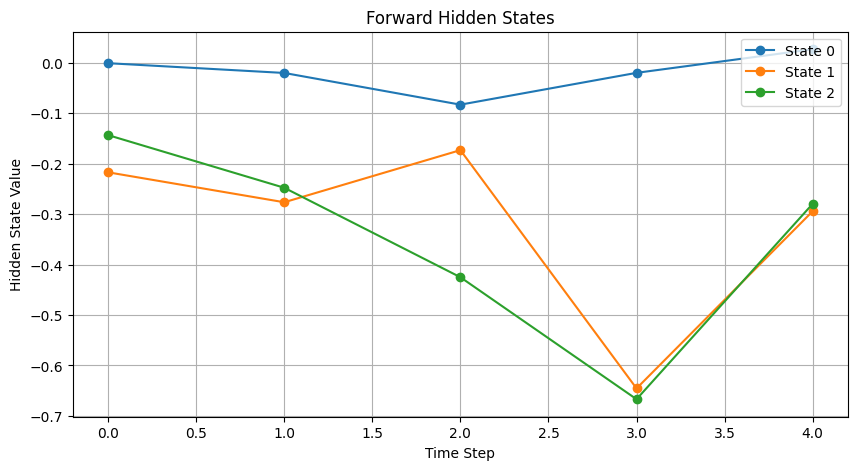

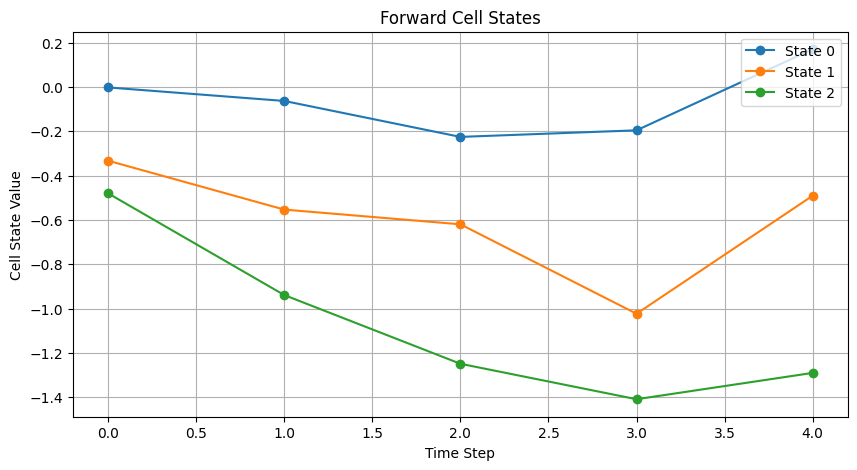

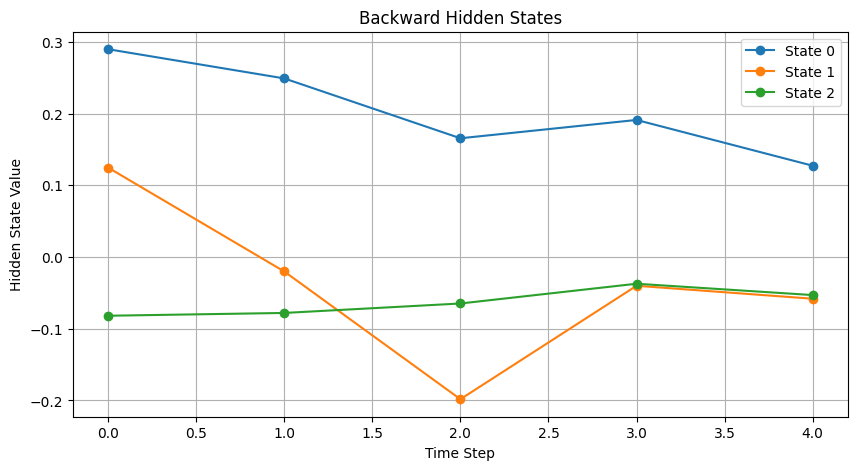

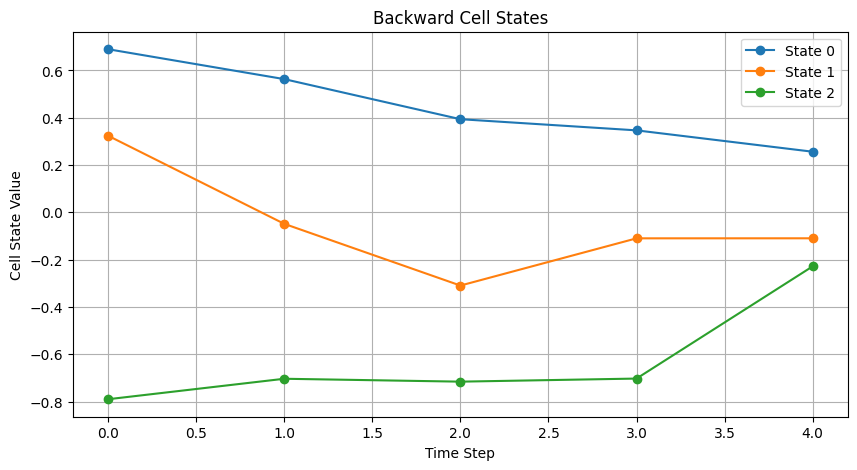

In [7]:
seq_len = 5
input_size = 3
hidden_size = 3
output_size = 1

# Example input data (random for demonstration)
X = np.random.rand(seq_len, input_size)

# Initialize Bi-LSTM
bi_lstm = BiLSTM(input_size, hidden_size, output_size)

# Forward pass
y_pred, h_forward_states, h_backward_states, c_forward_states, c_backward_states = bi_lstm.forward(X)

# Output prediction
print("Output:\n", y_pred)

# Plot forward and backward states
bi_lstm.plot_forward_states(h_forward_states, c_forward_states)
bi_lstm.plot_backward_states(h_backward_states, c_backward_states)


## updated

Number of classes: 2
Sentence: I love programming
Predicted probabilities: [0.37624745 0.29545676 0.43985302 0.21697021 0.36169086 0.62375255
 0.70454324 0.56014698 0.78302979 0.63830914]
Class labels: ['neutral' 'positive']
Length of predicted probabilities: 10
Number of class labels: 2
Prediction and class labels length mismatch. Skipping plot.


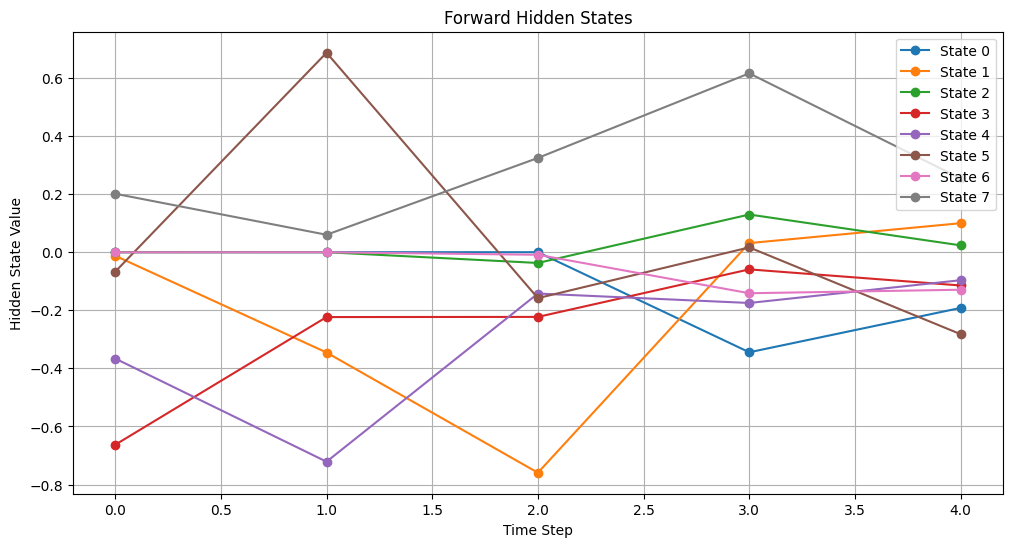

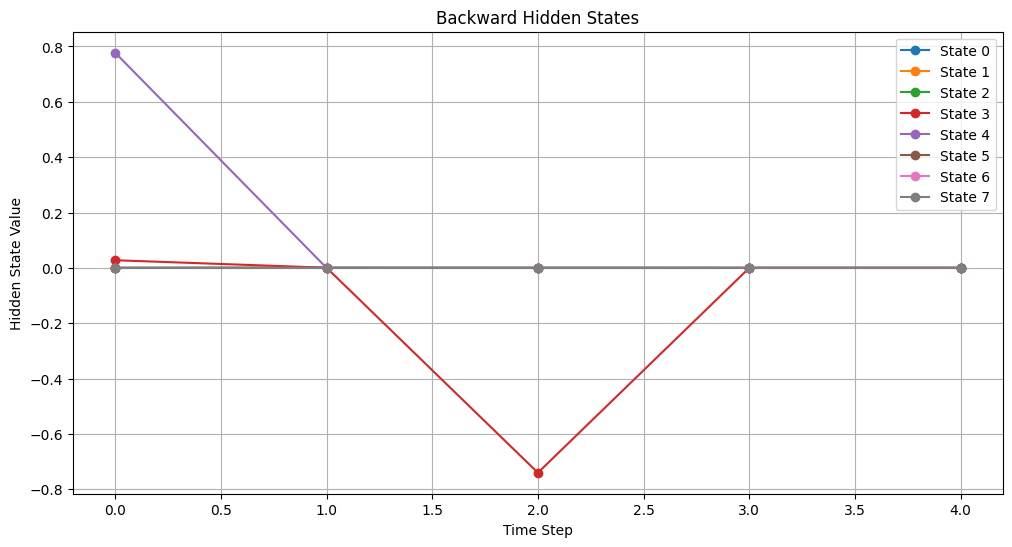

Sentence: Python is great
Predicted probabilities: [0.79834543 0.35261807 0.28288204 0.37312683 0.35811643 0.20165457
 0.64738193 0.71711796 0.62687317 0.64188357]
Class labels: ['neutral' 'positive']
Length of predicted probabilities: 10
Number of class labels: 2
Prediction and class labels length mismatch. Skipping plot.


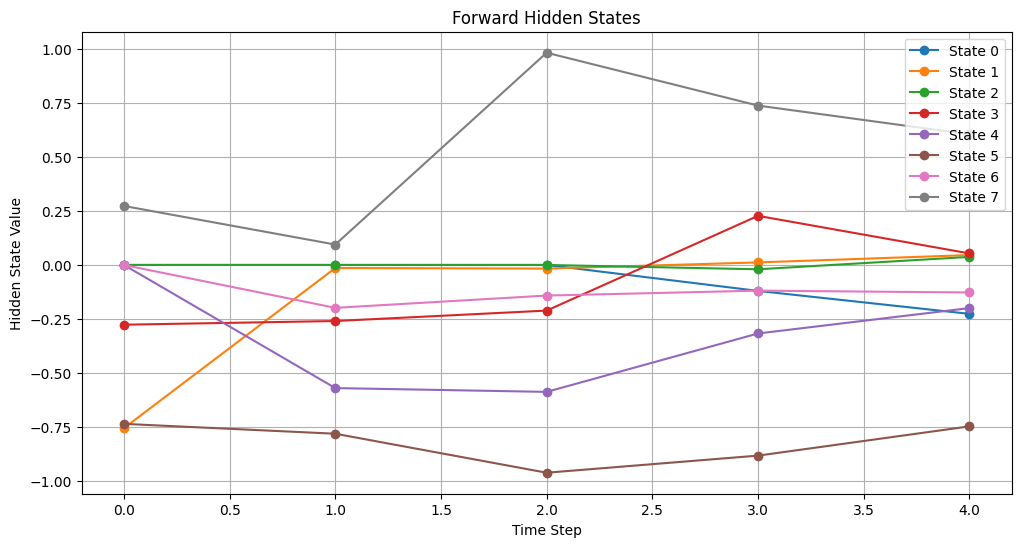

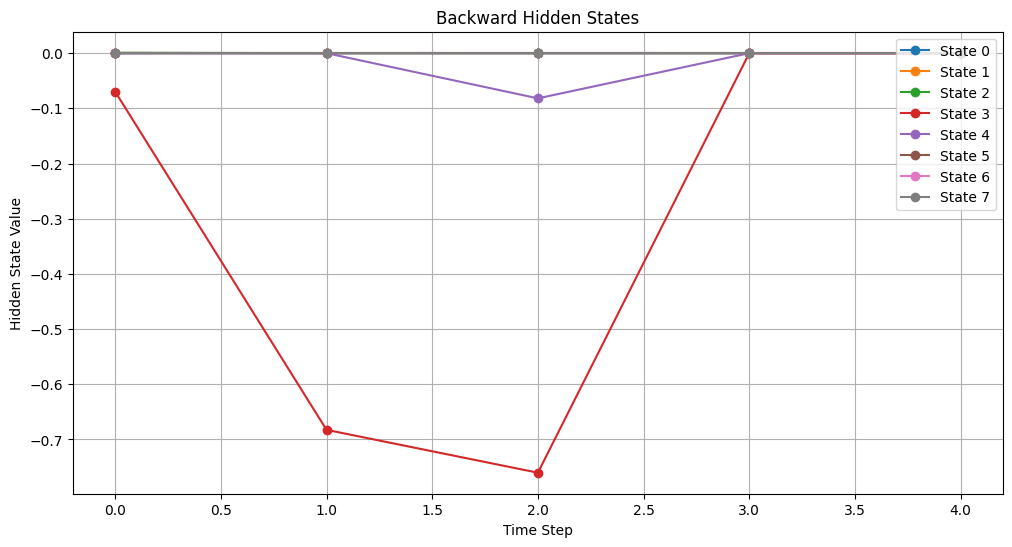

Sentence: Machine learning is the future
Predicted probabilities: [0.75125773 0.80981439 0.35195479 0.96063977 0.71354353 0.24874227
 0.19018561 0.64804521 0.03936023 0.28645647]
Class labels: ['neutral' 'positive']
Length of predicted probabilities: 10
Number of class labels: 2
Prediction and class labels length mismatch. Skipping plot.


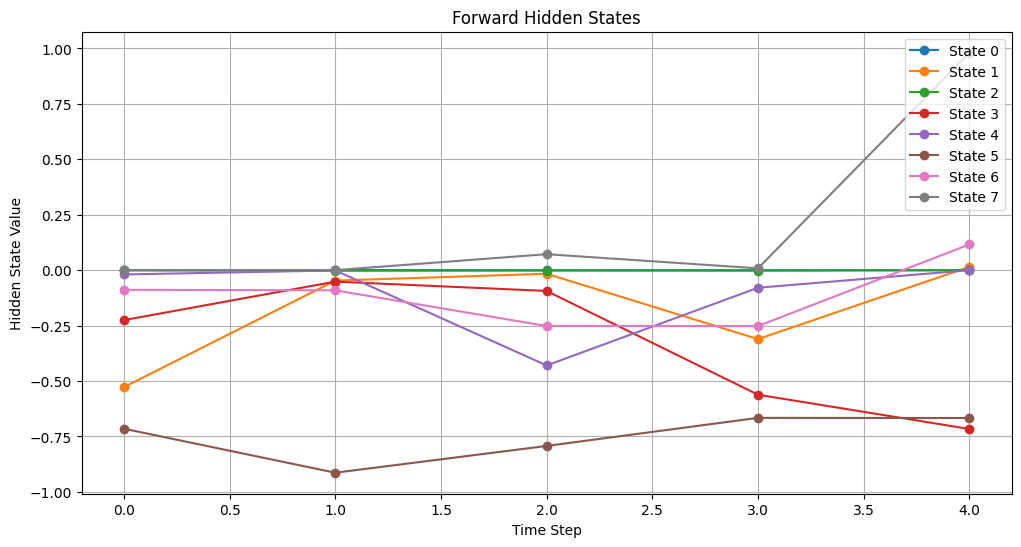

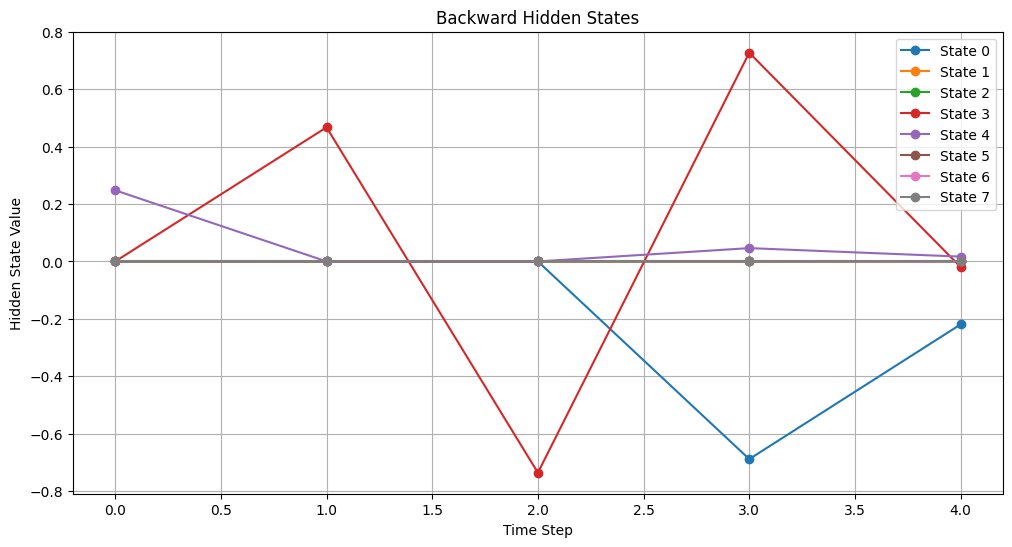

Sentence: I enjoy learning new things
Predicted probabilities: [0.35932005 0.60205848 0.77961886 0.71011718 0.81624055 0.64067995
 0.39794152 0.22038114 0.28988282 0.18375945]
Class labels: ['neutral' 'positive']
Length of predicted probabilities: 10
Number of class labels: 2
Prediction and class labels length mismatch. Skipping plot.


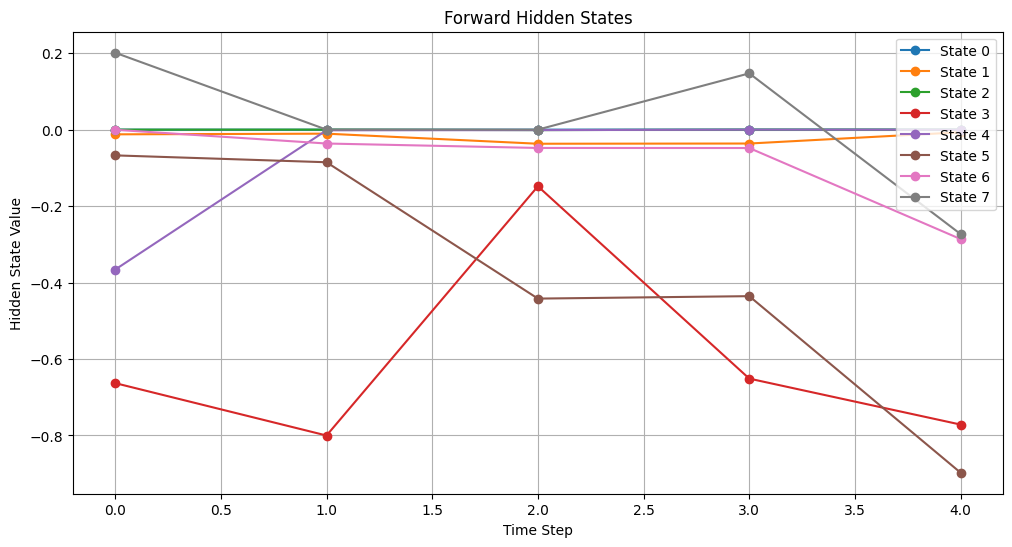

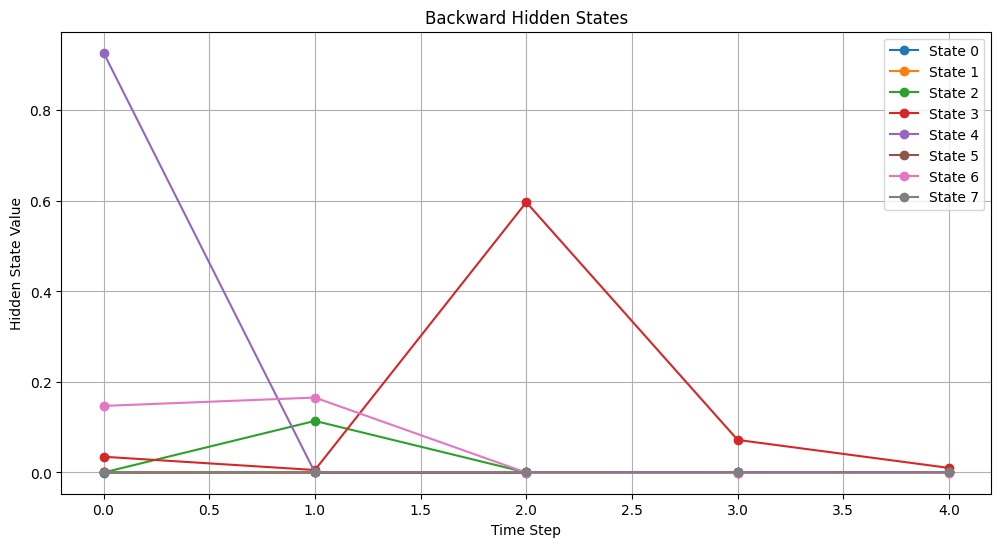

Sentence: AI is fascinating
Predicted probabilities: [0.70404121 0.29567071 0.71134755 0.40244443 0.44001731 0.29595879
 0.70432929 0.28865245 0.59755557 0.55998269]
Class labels: ['neutral' 'positive']
Length of predicted probabilities: 10
Number of class labels: 2
Prediction and class labels length mismatch. Skipping plot.


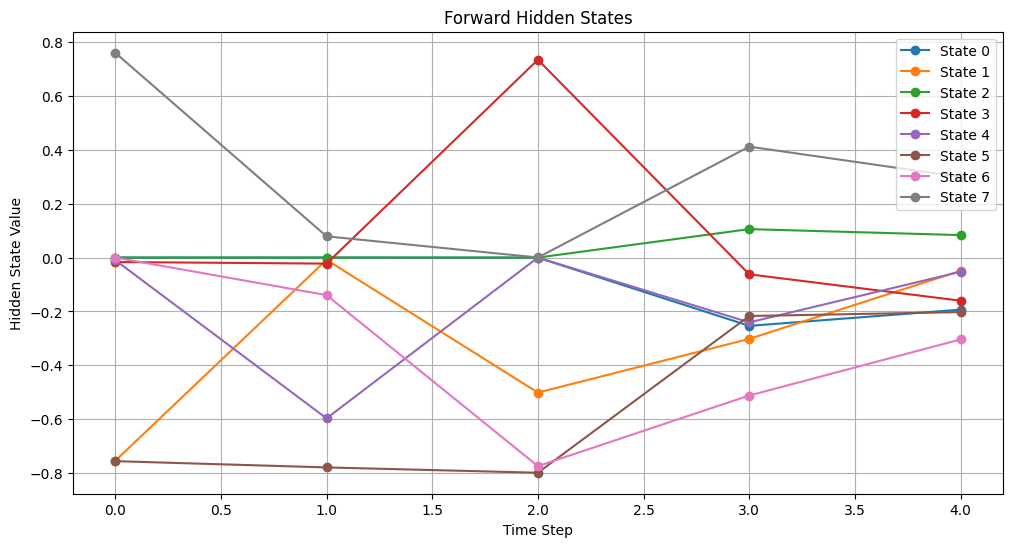

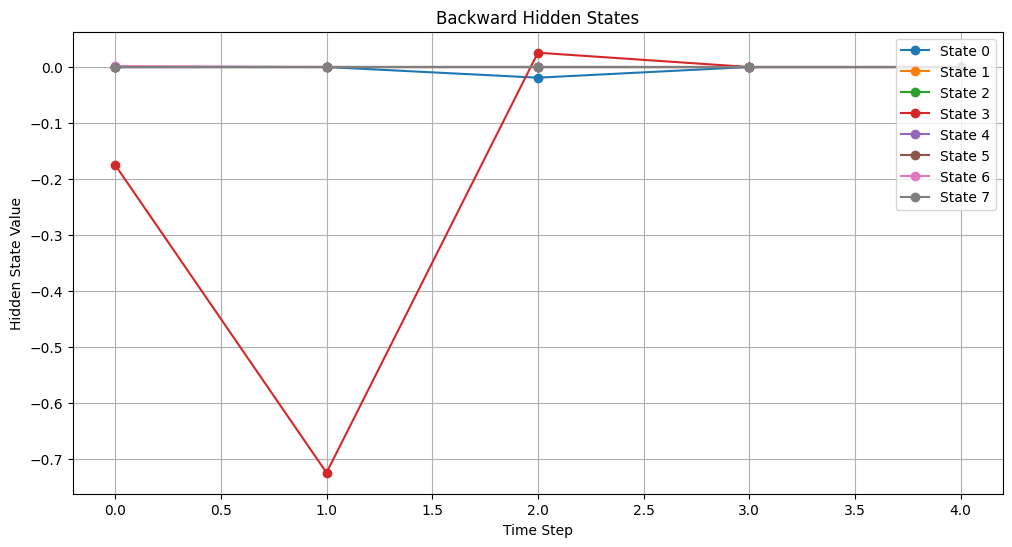

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_class_probabilities(y_pred, class_labels):
    plt.figure(figsize=(10, 5))
    plt.bar(class_labels, y_pred.flatten())
    plt.xlabel('Classes')
    plt.ylabel('Predicted Probability')
    plt.title('Predicted Class Probabilities')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

def plot_states(states, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    plt.plot(states, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend([f'State {i}' for i in range(states.shape[1])], loc='upper right')
    plt.grid(True)
    plt.show()

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size)
        self.bf = np.zeros((hidden_size, 1))
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size)
        self.bi = np.zeros((hidden_size, 1))
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size)
        self.bo = np.zeros((hidden_size, 1))
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size)
        self.bc = np.zeros((hidden_size, 1))

    def forward(self, x_t, h_prev, c_prev):
        combined = np.vstack((x_t, h_prev))
        f_t = sigmoid(np.dot(self.Wf, combined) + self.bf)
        i_t = sigmoid(np.dot(self.Wi, combined) + self.bi)
        c_hat_t = tanh(np.dot(self.Wc, combined) + self.bc)
        c_next = f_t * c_prev + i_t * c_hat_t
        o_t = sigmoid(np.dot(self.Wo, combined) + self.bo)
        h_next = o_t * tanh(c_next)
        return h_next, c_next

class BiLSTM:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.lstm_forward = LSTMCell(input_size, hidden_size)
        self.lstm_backward = LSTMCell(input_size, hidden_size)
        self.Wy = np.random.randn(output_size, 2 * hidden_size)
        self.by = np.zeros((output_size, 1))
    
    def forward(self, X):
        seq_len, input_size = X.shape
        h_f = np.zeros((self.hidden_size, 1))
        c_f = np.zeros((self.hidden_size, 1))
        h_b = np.zeros((self.hidden_size, 1))
        c_b = np.zeros((self.hidden_size, 1))
        
        h_forward_states = []
        c_forward_states = []
        h_backward_states = []
        c_backward_states = []
        
        for t in range(seq_len):
            x_t = X[t].reshape(-1, 1)
            h_f, c_f = self.lstm_forward.forward(x_t, h_f, c_f)
            h_forward_states.append(h_f.flatten())
            c_forward_states.append(c_f.flatten())
        
        for t in reversed(range(seq_len)):
            x_t = X[t].reshape(-1, 1)
            h_b, c_b = self.lstm_backward.forward(x_t, h_b, c_b)
            h_backward_states.insert(0, h_b.flatten())
            c_backward_states.insert(0, c_b.flatten())
        
        h_forward_states = np.array(h_forward_states)
        c_forward_states = np.array(c_forward_states)
        h_backward_states = np.array(h_backward_states)
        c_backward_states = np.array(c_backward_states)
        
        h_combined = np.hstack((h_forward_states, h_backward_states))
        y_pred = np.dot(self.Wy, h_combined.T) + self.by

        return y_pred, h_forward_states, h_backward_states, c_forward_states, c_backward_states
    
    def predict(self, X):
        y_pred, _, _, _, _ = self.forward(X)
        return softmax(y_pred).flatten()
    
    def plot_class_probabilities(self, y_pred, class_labels):
        if y_pred.size != len(class_labels):
            print(f"Error: Size of predictions {y_pred.size} does not match number of class labels {len(class_labels)}.")
            return
        plot_class_probabilities(y_pred, class_labels)
    
    def plot_hidden_states(self, h_forward_states, h_backward_states):
        plot_states(h_forward_states, 'Forward Hidden States', 'Time Step', 'Hidden State Value')
        plot_states(h_backward_states, 'Backward Hidden States', 'Time Step', 'Hidden State Value')

# Example data
sentences = ["I love programming", "Python is great", "Machine learning is the future", "I enjoy learning new things", "AI is fascinating"]
labels = ["positive", "positive", "neutral", "positive", "positive"]

# Simulated embeddings and sequence conversion (as previously described)
input_size = 300
max_seq_len = 5
vocab_size = 50

# Simulate word embeddings (random vectors for demonstration)
word_embeddings = {word: np.random.rand(input_size) for word in set(" ".join(sentences).split())}

# Convert sentences to sequences of embeddings
X = []
for sentence in sentences:
    words = sentence.split()
    sentence_embs = np.array([word_embeddings[word] for word in words])
    padded_embs = np.pad(sentence_embs, ((0, max_seq_len - len(sentence_embs)), (0, 0)), 'constant')
    X.append(padded_embs)
X = np.array(X)

# Labels and classes using LabelEncoder for multi-class classification
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
class_labels = encoder.classes_

# Ensure number of unique classes
num_classes = len(class_labels)
print(f"Number of classes: {num_classes}")  # Should be 23 in your actual dataset

# Initialize Bi-LSTM and predict
hidden_size = 8
output_size = num_classes  # Adjust this according to the actual number of classes

bi_lstm = BiLSTM(input_size, hidden_size, output_size)

# Predict and visualize for each sentence
for i, sentence_embs in enumerate(X):
    y_pred = bi_lstm.predict(sentence_embs)
    print(f"Sentence: {sentences[i]}")
    print(f"Predicted probabilities: {y_pred}")
    print(f"Class labels: {class_labels}")

    # Check prediction and class labels length
    print(f"Length of predicted probabilities: {len(y_pred)}")
    print(f"Number of class labels: {len(class_labels)}")

    # Ensure prediction and class labels length match
    if len(y_pred) == len(class_labels):
        bi_lstm.plot_class_probabilities(y_pred, class_labels)
    else:
        print("Prediction and class labels length mismatch. Skipping plot.")

    # Forward and backward hidden states
    _, h_forward_states, h_backward_states, _, _ = bi_lstm.forward(sentence_embs)
    bi_lstm.plot_hidden_states(h_forward_states, h_backward_states)
